Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jeffrey Petrella"
COLLABORATORS = "None"

---

<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# AIPI 520 Final Exam

In [1]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'communities.csv':'https://storage.googleapis.com/aipi_datasets/communities.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [2]:
import numpy as np
import pandas as pd

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

## Question 5: Predicting Violent Crimes [25 pts]
For this question we are going to examine factors which correlate to higher per-capita violent crime rates in communities across the U.S.  We have a large number of possible features to use (122) which include demographic data as well as data about police presence in the communities.  Refer to [this site](https://archive.ics.uci.edu/ml/datasets/communities+and+crime) for the explanation of each of the features included.

All numerical features (excluding the state, county and community codes) have been normalized to the range [0,1].  Additionally, outliers were removed by setting all values 3 standard deviations or more above the mean to 1 and all values 3 standard deviations or more below the mean to 0.

Note: the target variable we are predicting is the rate of **reported crime** (which is not necessarily equal to the rate of actual crime.

In [3]:
# Read data in and clean up
crimes = pd.read_csv('communities.csv',na_values=['?'])
crimes.fillna(crimes.mean(),inplace=True)
crimes.drop(columns=['state','country','community','communityname','fold'],inplace=True)
print(crimes.shape)
crimes.head()

(1994, 123)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


The below cell creates the feature matrix X and the target array y, and then splits the data into training and test sets using 20% of the data for the test set.

In [4]:
X = crimes.iloc[:,:-1]
y = crimes.iloc[:,-1]

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

### Q5.1 (4 points)
Let's start by using a linear regression model on the dataset.  In the cell below, use the training data to train a linear regression model, and return the trained linear model.  Then, run the below cell to calculate the MSE on the test set.  Finally, follow the below instructions to create the plot, and then answer Question 4.1 in the written document (only your written answer will be graded).

In [7]:
def run_linmodel(X_train,y_train):
    # YOUR CODE HERE
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model
    raise NotImplementedError()

In [8]:
# Get test set predictions using your linear model
lnmodel = run_linmodel(X_train,y_train)
test_preds = lnmodel.predict(X_test)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('The test set MSE of your model is {:.4f}'.format(test_mse))

The test set MSE of your model is 0.0209


Use the cell below to create a plot of the residuals (errors) versus the predicted values for the **training data**.  Then, answer Question 4.1 in the written document.  In your answer, paste a copy of your residuals vs. predicted values plot and explain how it supports your answers.  Only your written answer in the Word document will be graded, not your code below.

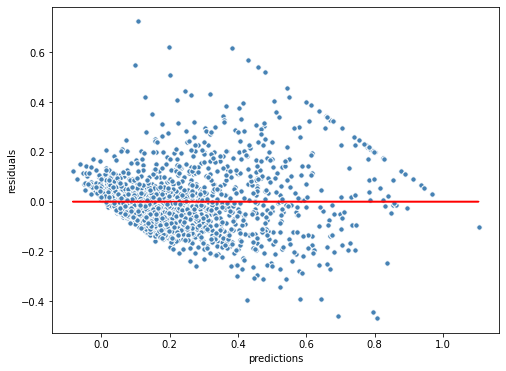

In [10]:
# YOUR CODE HERE
# Check for linearity of features-target relationship - plot residuals vs each feature
train_preds = lnmodel.predict(X_train)
resids = y_train - train_preds

# Plot the residuals vs. the fitted values
plt.figure(figsize=(8,6))
plt.scatter(train_preds,resids,color='steelblue',edgecolor='white',s=30)
plt.plot(train_preds,np.zeros(shape=len(train_preds)),color='red')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()
#raise NotImplementedError()

### Q5.2 [3 points]
Complete the function `build_shallow_tree()` which creates a shallow decision tree model from the training data using `max_depth=2` and `random_state=0`.  You should fit your tree to the training data and then return the fitted tree model.  Then run the cell below to dispay the tree and answer Q4.1 in the written document (put your written answer in the written document, NOT your notebook).  Only what is in the written document will be graded.

In [11]:
def build_shallow_tree(X,y):
    # YOUR CODE HERE
    tree_model = DecisionTreeRegressor(max_depth=2,random_state=0)
    tree_model.fit(X_train,y_train)
    return tree_model
    raise NotImplementedError()

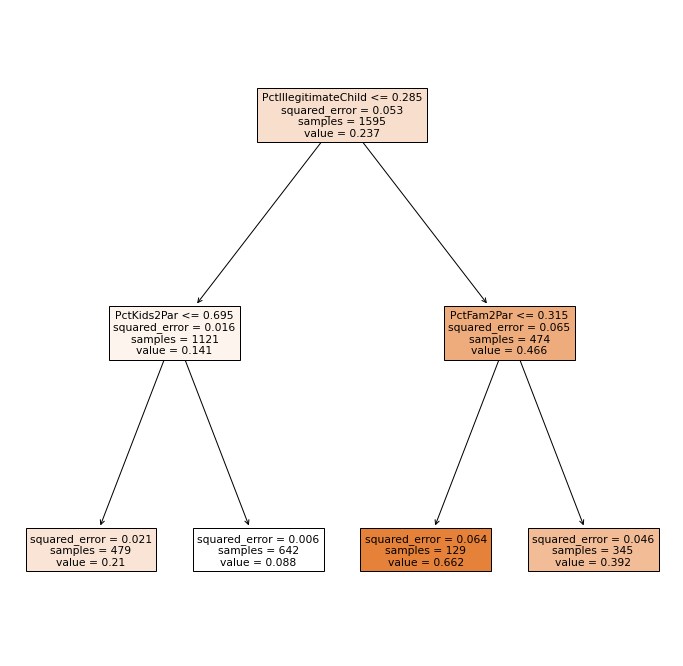

In [12]:
# Run cell to display your tree
tree = build_shallow_tree(X_train,y_train)
plt.figure(figsize=(12,12))
plot_tree(tree,feature_names=X.columns,filled=True)
plt.show()

Let's look at your shallow tree model's performance on the test set.  Run the cell below to calculate and display the performance on the test set.

In [13]:
# Get the predictions for the training and test sets
train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

# Calculate MSE
train_mae = 1/len(y_train)*np.sum(np.abs(train_preds-y_train))
test_mae = 1/len(y_test)*np.sum(np.abs(test_preds-y_test))
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mae,test_mae))

MSE train: 0.110, test: 0.119


### Q5.3 [8 points]
Complete the function `run_rf_model()` which takes the training and test sets as inputs as well as lists of possible values to evaluate for the hyperparameters `min_samples_leaf` and `max_samples`.  Your function should use cross-validation (you can use `cross_val_score` with 3-fold cross-validation and `neg_mean_squared_error` as the scoring metric) to determine the optimal values for `min_samples_leaf` and `max_features` from among the options in the input lists.  When instantiating the `RandomForestRegressor` be sure to use `random_state=0` and keep everything at the default settings except the two hyperparameters you are optimizing.  After you have found the optimal vlaues for `min_samples_leaf` and `max_features` (from the input lists), create a new random forest model using those hyperparameter values (and `random_state=0`) and re-train it on the entire training set.  Your function should return your trained random forest model using your optimal hyperparameter values.

NOTE: you MAY NOT use `GridSearchCV` on this question.

In [15]:
def run_rf_model(X_train,y_train,minsamplesleaf_vals,maxfeatures_vals):
    # YOUR CODE HERE
    scores=[]
    leaf_vals = []
    feat_vals = []
    for leaf in minsamplesleaf_vals:
      for feat in maxfeatures_vals:
        rf_model = RandomForestRegressor(min_samples_leaf=leaf, max_features=feat, random_state=0)
        score = cross_val_score(rf_model,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
        scores.append(-np.mean(score))
        leaf_vals.append(leaf)
        feat_vals.append(feat)
    idx = np.argmin(scores)
    opt_leaf = leaf_vals[idx]
    opt_feat = feat_vals[idx]

    rf_model_opt = RandomForestRegressor(min_samples_leaf=opt_leaf, max_features=opt_feat, random_state=0)
    rf_model_opt.fit(X_train, y_train)
    return rf_model_opt

    raise NotImplementedError()

In [16]:
# Test cell for run_rf_model
# This may take a minute to run

minsamplesleaf_vals = [1,5,20] #List of values to evaluate for min_samples_leaf
maxfeatures_vals = [0.5,1.] #List of values to evaluate for max_features

opt_rf = run_rf_model(X_train,y_train,minsamplesleaf_vals,maxfeatures_vals)
print('Your function found the optimal value of min_samples_leaf was {}'.format(opt_rf.get_params()['min_samples_leaf']))
print('Your function found the optimal value of max_features was {}'.format(opt_rf.get_params()['max_features']))
    
test_preds = opt_rf.predict(X_test)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('The test set MSE of your model is {:.4f}'.format(test_mse))


Your function found the optimal value of min_samples_leaf was 5
Your function found the optimal value of max_features was 0.5
The test set MSE of your model is 0.0203


### Q5.4 [4 points]
Let's now see which features are most valuable in predicting the violent crime rate.  Complete the below function `top_three_feats()` which takes as input your optimized random forest model and a list of the feature names (`feat_names`) and calculates the importance of each feature using the random forest model's feature importance scores.  Your function should return two lists: the first list should contain the feature names of the 3 most important features, and the second list should contain the feature importance scores of each of the top 3 features.  Both lists should be ordered in descending order with the most important feature first, and should contain ONLY the top 3 features.

In [50]:
def top_three_feats(model,feat_names):
    # YOUR CODE HERE
    ### BEGIN SOLUTION ###
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    
    return RF_ranking.iloc[0:3]['Feature'].to_list(), RF_ranking.iloc[0:3]['Importance'].to_list()
    raise NotImplementedError()

In [51]:
# Test cell for top_three_feats()
feature_names=X.columns
top_feats,scores = top_three_feats(opt_rf,feature_names)
print('Your top 3 most important features are:')
for feat,score in zip(top_feats,scores):
    print('{}, with importance score {:.3f}'.format(feat,score))
    
assert len(top_feats)==3
assert len(scores)==3
assert scores[0] >= scores[1]

Your top 3 most important features are:
PctIllegitimateChild, with importance score 0.267
PctKids2Par, with importance score 0.196
racePctWhite, with importance score 0.073


### Q5.5 [6 points]
Let's now try a gradient boosting model on our dataset.  Complete the below function `run_boosting_model()` which takes as inputs the training data as well as lists of possible values to evaluate for the hyperparameters `min_samples_leaf` and `n_estimators`.  Your function should use cross-validation (you can use `cross_val_score` with 3-fold cross-validation and `neg_mean_squared_error` as the scoring metric) to determine the optimal values for `min_samples_leaf` and `n_estimators` from among the options in the input lists.  When instantiating the `GradientBoostingRegressor` be sure to use `random_state=0` and keep everything at the default settings except the two hyperparameters you are optimizing.  After you have found the optimal vlaues for `min_samples_leaf` and `n_estimators` (from the input lists), create a new `GradientBoostingRegressor` model using those hyperparameter values (and `random_state=0`) and re-train it on the entire training set.  Your function should return your trained model using your optimal hyperparameter values.

NOTE: you MAY NOT use `GridSearchCV` on this question.

In [17]:
def run_boosting_model(X_train,y_train,minsamplesleaf_vals,nestimator_vals):
    # YOUR CODE HERE
    scores=[]
    leaf_vals = []
    est_vals = []
    for leaf in minsamplesleaf_vals:
      for est in nestimator_vals:
        boosting_model = GradientBoostingRegressor(min_samples_leaf=leaf,n_estimators=est,random_state=0)
        score = cross_val_score(boosting_model,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
        scores.append(-np.mean(score))
        leaf_vals.append(leaf)
        est_vals.append(est)
    idx = np.argmin(scores)
    opt_leaf = leaf_vals[idx]
    opt_est = est_vals[idx]

    boosting_model_opt = GradientBoostingRegressor(min_samples_leaf=opt_leaf,n_estimators=opt_est,random_state=0)
    boosting_model_opt.fit(X_train, y_train)
    return boosting_model_opt
    raise NotImplementedError()

In [18]:
# Test cell for run_boosting_model
# This may take a minute to run

minsamplesleaf_vals = [5,20] #List of values to evaluate for min_samples_leaf
nestimator_vals = [50,100] #List of values to evaluate for n_estimators

opt_boosting = run_boosting_model(X_train,y_train,minsamplesleaf_vals,nestimator_vals)
print('Your function found the optimal value of min_samples_leaf was {}'.format(opt_boosting.get_params()['min_samples_leaf']))
print('Your function found the optimal value of n_estimators was {}'.format(opt_boosting.get_params()['n_estimators']))
    
test_preds = opt_boosting.predict(X_test)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('The test set MSE of your model is {:.4f}'.format(test_mse))


Your function found the optimal value of min_samples_leaf was 5
Your function found the optimal value of n_estimators was 100
The test set MSE of your model is 0.0211


## Question 6: Neural Network [16 pts]
We will now use a neural network in PyTorch to model the violent crimes data from the previous question.

In [19]:
X = crimes.iloc[:,:-1]
y = crimes.iloc[:,-1]

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

### Q6.1 [3 points]
Complete the below function `prep_dataloaders()`, which takes as input the training and test data and the batch size.  The function should create TensorDatasets for the training and test data and then create DataLoaders for each set.  Your function should return the training dataloader and test dataloader.  Be sure to set `shuffle=False` for the test set dataloader.

In [61]:
def prep_dataloaders(X_train,y_train,X_test,y_test,batch_size):
    # YOUR CODE HERE
    # Set random seeds
    torch.manual_seed(0)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(0)

    # Convert training and test data to TensorDatasets
    trainset = TensorDataset(torch.tensor(X_train.values), 
                            torch.tensor(y_train.values))
    testset = TensorDataset(torch.tensor(X_test.values), 
                            torch.tensor(y_test.values))

    # Create Dataloaders for our training and test data to allow us to iterate over minibatches 
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    return trainloader, testloader
    raise NotImplementedError()

In [62]:
# Test cell for prep_dataloader
batchsize = 32
trainloader,testloader = prep_dataloaders(X_train,y_train,X_test,y_test,batchsize)
chunk = next(iter(trainloader))
assert len(chunk) == 2
assert len(chunk[1]==batchsize)


### Q6.2 [5 points]
Complete the below class `RegressionNet`.  The class should contain an `__init__` method to initiate the neural network and a `forward` method to pass data forward through the network and return the output of the model.  

Your `RegressionNet` architecture should contain 3 sets of weights using the following names for each set:  
- `self.hidden1`: a fully-connected linear layer which receives the feature inputs and passes them to hidden1 
- `self.hidden2`: a fully-connected linear layer which receives the outputs from the hidden1 layer and passes them to hidden2. 
- `self.out`: a ully-connected linear layer which receives the outputs from the hidden2 layer and passes them out of the network as the output

Each of the 2 hidden layers should be followed by a ReLu activation function.  The output layer should not contain any activation function.

The number of units for hidden1 and hidden2 layers are passed as inputs when the RegressionNet is initialized.  You should hardcode any other needed values to define the network.

In [26]:
class RegressionNet(nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super().__init__()
        # YOUR CODE HERE
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.out = nn.Linear(n_hidden2, n_output)
        raise NotImplementedError()

    def forward(self, x):
        # YOUR CODE HERE
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.out(x)
        return x

        raise NotImplementedError()

In [27]:
# Test cell for RegressionNet
# Instantiate our neural network

net = RegressionNet(n_hidden1=50, n_hidden2=5)

assert net.hidden1.out_features == net.hidden2.in_features
assert net.out.in_features == 5


NameError: ignored

### Q6.3 [4 points]
Complete the below function `train_model()` which takes as input the instantiated RegressionNet, the loss function (`criterion`), the optimizer, the trainloader, and the number of epochs (`num_iter`).  The function should use the minibatches in the trainloader to train the model for the input number of iterations/epochs `num_iter`.  Your function should return a list of the total cost/loss values (as floats) for each iteration of the training (NOT each individual minibatch, but rather the sum of the loss across all minibatches for each iteration/epoch).

Hint: if you are getting a dimension mismatch error between the model outputs (`outputs`) and the labels (`labels`), check the dimensions of each and you might need to reshape one or the other so that they match.

In [28]:
def train_model(model,criterion,optimizer,trainloader,num_iter):
    model.train() # Set the model to training mode
    # YOUR CODE HERE
    # Define the cost / loss function
    cost_fn = criterion

    # Define the method of updating the weights each iteration (e.g. gradient descent)
    optimizer = optimizer
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    num_iter = num_iter
    cost = []
    net = model
    net = net.to(device)
    net.train() # Set the model to training mode

    for epoch in range(num_iter):

        running_loss = 0.0
        
        for i, data in enumerate(trainloader):
            
            # Get the inputs X and labels y for the minibatch
            inputs, labels = data[0].to(device), data[1].to(device)

            # Zero the gradients of the weights each iteration
            optimizer.zero_grad()

            # Calculate the predictions and the cost/loss
            outputs = net(inputs).view(-1) # Convert outputs to 1D array instead of 2D to match labels
            loss = cost_fn(outputs, labels)
            
            # Use autograd to calculate the gradient of the cost with respect to each weight
            loss.backward()
            
            # Use the optimizer to do the weights update
            optimizer.step()

            # Store the cost/loss
            running_loss += loss.item()
            
        cost.append(running_loss)
            
    plt.plot(cost)
    plt.xlabel('Epoch')
    plt.ylabel('Cost/loss')
    plt.show()


    raise NotImplementedError()

In [29]:
# Test cell for train_model()
# This may take some time to run

net = RegressionNet(n_hidden1=50, n_hidden2=5)
# Define the cost / loss function
criterion = nn.MSELoss()
# Define the method of updating the weights each iteration
optimizer = optim.SGD(net.parameters(), lr=0.01)
# Number of iterations (epochs) to train
n_iter = 200

cost_path = train_model(net,criterion,optimizer,trainloader,n_iter)

plt.plot(cost_path)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

assert len(cost_path)==n_iter


NameError: ignored

### Q6.4 [4 points]
Complete the below function `test_model()` which takes as input your trained model and the PyTorch dataloader for your test set `testloader`. The function should iterate through all the minibatches in the testloader, passing the data through the model to get the model outputs. Your function should return a list of the model predictions on the test set.

In [36]:
def test_model(model,test_loader):
  # Turn autograd off
  # YOUR CODE HERE
  # Set the model to evaluation mode
  net = model
  net.eval()
  with torch.no_grad():
      # Set up lists to store true and predicted values
      y_true = y_test.tolist
      test_preds = []

      # Calculate the predictions on the test set and add to list
      for data in test_loader:
          inputs, labels = data[0].to(device), data[1].to(device)
          outputs = net.forward(inputs)
          test_preds.extend(outputs.numpy().flatten().tolist())

      # Convert the predictions to discrete and calculate the accuracy
      test_preds = np.round(test_preds)
      return test_preds
      raise NotImplementedError()

In [37]:
# Test cell for test_model()
testpreds = test_model(net,testloader)
assert type(testpreds) == list
assert len(testpreds) == len(y_test)
test_mse = 1/len(y_test)*np.sum((np.array(testpreds)-np.array(y_test))**2)
print('The test set MSE of your model is {:.4f}'.format(test_mse))


NameError: ignored

# THE END 
Congratulations on finishing the course!